In [8]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import geopandas as gpd
# https://help.waterdata.usgs.gov/code/parameter_cd_nm_query?parm_nm_cd=%25discharge%25&fmt=html
# https://waterdata.usgs.gov/blog/dataretrieval/

In [9]:
site = '12488500'
huc12='170300020106'
huc10 = '1703000201'
huc8 = '17030002'
df3 = nwis.get_record(sites=site, service='dv', start='1997-01-01', end='2020-12-31', parameterCd='00060')

In [10]:
df3

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1997-01-01 00:00:00+00:00,398.0,A,12488500
1997-01-02 00:00:00+00:00,691.0,A,12488500
1997-01-03 00:00:00+00:00,639.0,A,12488500
1997-01-04 00:00:00+00:00,431.0,A,12488500
1997-01-05 00:00:00+00:00,318.0,A,12488500
...,...,...,...
2020-12-27 00:00:00+00:00,185.0,A,12488500
2020-12-28 00:00:00+00:00,170.0,A,12488500
2020-12-29 00:00:00+00:00,156.0,A,12488500


<AxesSubplot:xlabel='datetime'>

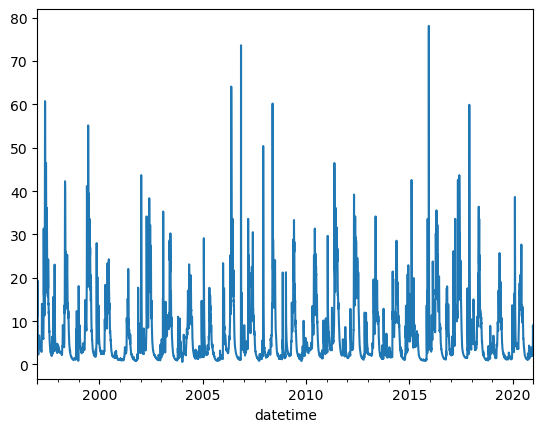

In [3]:
# convert cub ft per sec to cub m per sec
df3['discharge'] = df3['00060_Mean']*0.028
df3['discharge'].plot()

In [4]:
site_info = nwis.get_record(site=site, service='site')

In [5]:
import geopandas as gpd
all_info = nwis.get_info(huc=huc8, siteType='ST')
gdf = gpd.GeoDataFrame(all_info[0], geometry=gpd.points_from_xy(all_info[0].dec_long_va, all_info[0].dec_lat_va))

# read ARW watersed
arw = gpd.read_file('/home/jbk/projects/climate/interface/watershed_intercomparison/model/shape_files/arw_huc10_1802011102.shp')

In [6]:
subset = gpd.overlay(gdf, arw, how='intersection')
subset.head()

/tmp/ipykernel_447524/929828835.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  subset = gpd.overlay(gdf, arw, how='intersection')


,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,areasqkm,states,huc10,name,hutype,humod,globalid,shape_Leng,shape_Area,geometry
0,USGS,12487050,"NF LITTLE NACHES RIVER AB MF NEAR CLIFFDELL, WA",ST,470523.0,1211352.0,47.089559,-121.232311,M,S,...,889.85,WA,1703000201,Little Naches River,S,None,{1B73A39F-E29C-11E2-8094-0021280458E6},1.846932,0.105147,POINT (-121.23231 47.08956)
1,USGS,12487200,"LITTLE NACHES RIVER AT MOUTH NEAR CLIFFDELL, WA",ST,465925.0,1210555.0,46.990117,-121.099806,M,S,...,889.85,WA,1703000201,Little Naches River,S,None,{1B73A39F-E29C-11E2-8094-0021280458E6},1.846932,0.105147,POINT (-121.09981 46.99012)
2,USGS,12487400,"DEEP CREEK NEAR GOOSE PRAIRIE, WA",ST,464730.0,1211930.0,46.791502,-121.326196,M,S,...,889.85,WA,1703000201,Little Naches River,S,None,{1B73A39F-E29C-11E2-8094-0021280458E6},1.846932,0.105147,POINT (-121.32620 46.79150)
3,USGS,12488000,"BUMPING RIVER NEAR NILE, WA",ST,465222.0,1211729.0,46.872614,-121.292586,M,S,...,889.85,WA,1703000201,Little Naches River,S,None,{1B73A39F-E29C-11E2-8094-0021280458E6},1.846932,0.105147,POINT (-121.29259 46.87261)
4,USGS,12488050,"BUMPING RIVER AT SODA SPRINGS WALKWAY NR NILE, WA",ST,465527.0,1211250.0,46.924004,-121.215085,M,S,...,889.85,WA,1703000201,Little Naches River,S,None,{1B73A39F-E29C-11E2-8094-0021280458E6},1.846932,0.105147,POINT (-121.21509 46.92400)


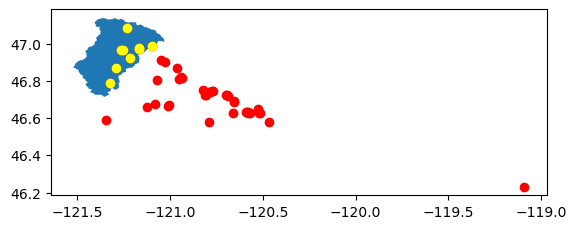

In [7]:
fig, ax = plt.subplots(1,1)
arw.plot(ax=ax)
gdf.plot(ax=ax, color='red')
subset.plot(ax=ax, color='yellow')
plt.show()

In [71]:
all_info[0]

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,12487050,"NF LITTLE NACHES RIVER AB MF NEAR CLIFFDELL, WA",ST,470523.00,1211352.00,47.089559,-121.232311,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.23231 47.08956)
1,USGS,12487200,"LITTLE NACHES RIVER AT MOUTH NEAR CLIFFDELL, WA",ST,465925.00,1210555.00,46.990117,-121.099806,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.09981 46.99012)
2,USGS,12487400,"DEEP CREEK NEAR GOOSE PRAIRIE, WA",ST,464730.00,1211930.00,46.791502,-121.326196,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.32620 46.79150)
3,USGS,12487500,"NACHES RIVER BELOW ROCK CREEK NEAR CLIFFDELL, WA",ST,465212.00,1205735.00,46.869842,-120.960912,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-120.96091 46.86984)
4,USGS,12488000,"BUMPING RIVER NEAR NILE, WA",ST,465222.00,1211729.00,46.872614,-121.292586,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.29259 46.87261)
5,USGS,12488050,"BUMPING RIVER AT SODA SPRINGS WALKWAY NR NILE, WA",ST,465527.00,1211250.00,46.924004,-121.215085,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.21509 46.92400)
6,USGS,12488100,"BUMPING RIVER AT AMERICAN RIVER, WA",ST,465830.00,1211010.00,46.974838,-121.170641,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.17064 46.97484)
7,USGS,12488250,"AMERICAN RIVER AT HELLS CROSSING NEAR NILE, WA",ST,465804.00,1211545.00,46.967614,-121.263698,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.26370 46.96761)
8,USGS,12488300,"AMERICAN RIVER TRIBUTARY NEAR NILE, WA",ST,465759.00,1211519.00,46.966225,-121.256476,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.25648 46.96623)
9,USGS,12488500,"AMERICAN RIVER NEAR NILE, WA",ST,465840.00,1211003.00,46.977616,-121.168696,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.16870 46.97762)
